# 1 Author

**Student Name**: Heng Zhou

**Student ID**:  210985436


# 2 Problem formulation

**1. Classification: Identifying Smiling Expressions in Images**

Determining whether individuals in an image are smiling has significant applications, particularly in psychology and human behavior analysis. Moreover, the implementation of a state-of-the-art (SOTA) model as an automatic annotator can greatly enhance efficiency by reducing time and cost.

**2. Regression: Determining the 3-D Position of Head Poses in Images**

Accurately detecting the nuanced 3-D positions of head poses in images allows for a deeper investigation into the correlation between specific head orientations and certain facial expressions. Similarly, employing a SOTA model as an automatic annotator can streamline processes, offering substantial time and cost savings.



# 3 Machine Learning pipeline

The machine learning pipeline is structured as follows:

1. Preprocess the dataset.
2. Implement data augmentation.
3. Fit a model.
4. Evaluate the model.
Given that the two tasks mentioned in Section 2 are distinct, it is prudent to train two separate models for making predictions.

**For Classification:**
Input: A matrix representing the image's encoding method, such as RGB or grayscale.
Output: A binary label (0 or 1).
Data Augmentation: This step involves processing the dataset through techniques like rotation, pixel removal, and image flipping.

**For Regression:**
Input: Similar to classification, a matrix representing the image's encoding method, such as RGB or grayscale.
Output: Three floating-point numbers representing the 3-D position.

**Data Augmentation:**
This process mirrors that of the classification task, involving dataset manipulation through rotation, pixel removal, and flipping.

# 4 Transformation stage

In image processing, the arrangement and values of pixels are crucial. In my approach, specific transformations are applied to the images. These include:

Flipping and rotating some images to introduce variability.
Normalizing pixel values to a range between 0 and 1.
Randomly dropping pixels to simulate variations and imperfections in the data.
These transformation techniques are instrumental in enhancing the model's effectiveness and robustness. By introducing such variations, we significantly reduce the risk of overfitting. This ensures that the model performs well not just on the training data, but also generalizes effectively to new, unseen data.

The specific implementation details are as follows:

In [38]:
from torchvision import transforms

# Data augmentation and normalization for training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


val_test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# 5 Modelling

In this section, I will try several models:

**SVM:**

To employ what I have learnt in the class, I use sklearn library to implement SVM. It is based on feature enginnering and statistical learning, somewhat different from deep neural network.

**CNN:**

CNN is universally acknowledged to be efficient for image. And it is thought to be a great fundation of DL. I use a three layer simple CNN for classification.

**ResNet:**

ResNet is a great breakthrough in DL, indicating a new era. Its structure avoids gradient disapperances, acclerating the training process. To dive into the effects of the number of layers do to the performance, I use two variants, e.g. ResNet18 and ResNet50


In [39]:
import torch.nn as nn
import torch
import torch.nn.functional as F

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256 * 56 * 56, 128) 
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x))))
        x = F.leaky_relu(self.bn2(self.conv2(x)))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x))))
        x = F.leaky_relu(self.bn4(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [40]:
from torchvision import models
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='linear', gamma='auto')
resnet = models.resnet50(pretrained=True)
resnet18 = models.resnet18(pretrained=True)
cnn = CNN(num_classes=2)
cnn_detection = CNN(num_classes=3)
# vgg16 = models.vgg16(pretrained=True)

# num_classes = 2  # for binary classification
# vgg16.classifier[6] = torch.nn.Linear(vgg16.classifier[6].in_features, num_classes)

/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/root/miniconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most 

# 6 Methodology

**Training Process:**
* Deep Learning Model:
  * Hyperparameter Setting: Initially, I configure hyperparameters with an epoch count of 100, a learning rate of 0.001, and a batch size of 32.
  * Loss Function and Optimizer: The CrossEntropy loss function is implemented, alongside the Ada optimizer with a learning rate decay parameter.
  * Training Loop: The training involves iterating over the dataset, with inputs in the format (batch_size, height, width). Backpropagation is performed based on the model outputs and labels.
  * Early Stopping: An early-stop strategy is implemented to prevent overfitting. Training halts if there's no improvement in accuracy for 10 consecutive epochs.
* Traditional Machine Learning Model:
  * The process is more straightforward, involving fitting the feature matrix X to the target vector y.
  
**Testing Process:**
  * The validation dataset is used for testing. The model is set to 'eval' mode, replicating the training steps but without updating the parameters. Notably, accuracy is used as the evaluation metric for classification tasks, and Mean Squared Error (MSE) for regression tasks.

**Evaluation Metrics:**
  * Accuracy: This is the primary metric for classification models, indicating the proportion of correctly predicted instances.
  * MSE (Mean Squared Error): Used for regression tasks, MSE measures the average of the squares of the errors, providing insight into the model’s predictive accuracy.


In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np
import copy
from tqdm import tqdm

# Train the model
def train(model_name, model, train_loader, val_loader, test_loader, task):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'------------------------------------------------{model_name}------------------------------------------------')
    
    # Initialize the model
    if task == 'classification':
        if model_name == 'resnet':
            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, 2)
        elif model_name == 'resnet18':
            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, 2)
    if task == 'Detection':
        if model_name == 'resnet':
            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, 3)
        elif model_name == 'resnet18':
            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, 3)
    model = model.to(device)

    # Define the loss function and optimizer
    if task == 'classification':
        criterion = nn.CrossEntropyLoss()
    elif task == 'Detection':
        mse_criterion = nn.MSELoss()

    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1) 

    train_losses, val_losses = [], []
    train_mse_losses, val_mse_losses = [], []
    train_accuracies, val_accuracies = [], []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    best_mse = float('inf') 
    early_stopping_counter = 0

    num_epochs = 100 

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        model.train()
        train_loss = 0.0
        train_mse_loss = 0.0
        train_corrects = 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)

            if task == 'Detection':
                labels = labels.float()
                mse_loss = mse_criterion(outputs, labels)
                train_mse_loss += mse_loss.item() * inputs.size(0)

                loss = mse_loss
            elif task == 'classification':
                labels = labels.long()
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)
                train_corrects += torch.sum(preds == labels.data)

            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)



        scheduler.step()
        epoch_train_loss = train_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)
        if task == 'Detection':
            epoch_train_mse_loss = train_mse_loss / len(train_loader.dataset)
            train_mse_losses.append(epoch_train_mse_loss)
        elif task == 'classification':
            epoch_train_acc = train_corrects.double() / len(train_loader.dataset)
            train_accuracies.append(epoch_train_acc.item())
            
        if task == 'Detection':
            print(f'Train mse Loss: {epoch_train_mse_loss:.4f}')
        elif task == 'classification':
            print(f'Train Loss: {epoch_train_loss:.4f} | Train Accuracy: {epoch_train_acc:.4f}')
            
        model.eval()
        val_corrects = 0
        val_loss = 0
        val_mse_loss = 0
        
        # Validation phase
        
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation"):
                if task == 'Detection':
                    labels = torch.tensor(labels, dtype=torch.float)
                elif task == 'classification':
                    labels = torch.tensor(labels, dtype=torch.long)
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                if task == 'Detection':
                    labels = labels.float()
                    mse_loss = mse_criterion(outputs, labels)
                    val_mse_loss += mse_loss.item() * inputs.size(0)

                    loss = mse_loss
                elif task == 'classification':
                    labels = labels.long()
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)
                    val_corrects += torch.sum(preds == labels.data)
                val_loss += loss.item() * inputs.size(0)

        epoch_val_loss = val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)
        if task == 'Detection':
            epoch_val_mse_loss = val_mse_loss / len(val_loader.dataset)
            val_mse_losses.append(epoch_val_mse_loss)
        elif task == 'classification':
            epoch_val_acc = val_corrects / len(val_loader.dataset)
            val_accuracies.append(epoch_val_acc.item())
            
        if task == 'Detection':
            print(f'Val mse Loss: {epoch_val_mse_loss:.4f}')

        if task == 'Detection' and epoch_val_mse_loss < best_mse:
            best_mse = epoch_val_mse_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            early_stopping_counter = 0
        elif task == 'classification' and epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
        
        if task == 'classification':
            print(f'Epoch {epoch+1}/{num_epochs}: Train Loss: {epoch_train_loss:.4f} Acc: {epoch_train_acc:.4f} Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.4f}')
        if early_stopping_counter > 10:
            print('Early stopping')
            break

    torch.save(best_model_wts, f'{model_name}-{task}.pth')

    model.load_state_dict(best_model_wts)

    # Test phase
    model.eval()
    test_loss = 0.0
    test_corrects = 0
    test_mse_loss = 0

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Testing"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            if task == 'Detection':
                labels = labels.float()
                mse_loss = mse_criterion(outputs, labels)
                test_mse_loss += mse_loss.item() * inputs.size(0)
            elif task == 'classification':
                labels = labels.long()
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)
                test_corrects += torch.sum(preds == labels.data)

    # Calculate and print test metrics
    if task == 'Detection':
        avg_test_mse_loss = test_mse_loss / len(test_loader.dataset)
        print(f'Test MSE Loss: {avg_test_mse_loss:.4f}')
    elif task == 'classification':
        test_accuracy = test_corrects.double() / len(test_loader.dataset)
        print(f'Test Accuracy: {test_accuracy:.4f}')

    # Return train, validation, and test metrics
    if task == 'Detection':
        return train_mse_losses, val_mse_losses
    elif task == 'classification':
        return train_losses, train_accuracies, val_losses, val_accuracies

# 7 Dataset

In the initial phase of my machine learning process, I undertake the following steps:

**Data Ingestion:** I start by reading the images and their corresponding labels, compiling them into a dataset.

**Preprocessing:** As previously mentioned, I perform several preprocessing steps on this dataset. These include normalization, pixel dropping, flipping, and rotation, among others. These techniques are vital for enhancing model performance and ensuring robustness against variations in the input data.

**Dataset Splitting:** The dataset is divided into training, validation, and test sets following a 7:1.5:1.5 ratio. This split ensures that the model is trained on a substantial amount of data, while also leaving enough data for validation and testing to accurately assess the model's performance.

**Pipeline Optimization:** To streamline the processing, I developed a custom class named MyDataset. This class is designed to facilitate smoother integration and handling of data within the machine learning pipeline, ensuring that the flow from data ingestion to model training is efficient and effective.

In [42]:
'''
load dataset
'''

import cv2
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '0'
root = 'files'
predictors = []

classification_labels = []
detection_labels = []
with open('labels.txt') as f:
    for line in f.readlines():
        classification_labels.append(int(line[0]))
        line = line[2:].split()
        detection_labels.append((float(line[0]), float(line[1]), float(line[2])))
        
for i in range(len(detection_labels)):
    detection_label = detection_labels[i]
    classification_label = classification_labels[i]
    filename = f'{root}//file{str(i+1).zfill(4)}.jpg'
    img = cv2.imread(filename)
    img = cv2.resize(img, (256, 256))
    predictors.append(img)

classification_dataset = []
for i in range(len(classification_labels)):
    classification_dataset.append((predictors[i], classification_labels[i]))
    
detection_dataset = []
for i in range(len(detection_labels)):
    detection_dataset.append((predictors[i], detection_labels[i]))
    

In [43]:
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# Custom dataset class
class MyDataset(Dataset):
    def __init__(self, predictors, labels, transform=None):
        assert len(predictors) == len(labels), "Length of predictors and labels should be equal"
        self.predictors = predictors
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.predictors[idx]
        image = Image.fromarray(image.astype('uint8'))
        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return image, label

# Split ratios
ratio_train = 0.7
ratio_val = 0.15
ratio_test = 0.15

# Creating datasets
classification_dataset = MyDataset(predictors, classification_labels, transform)
detection_dataset = MyDataset(predictors, detection_labels, transform)

# Splitting datasets
train_size = int(ratio_train * len(classification_dataset))
val_size = int(ratio_val * len(classification_dataset))
test_size = len(classification_dataset) - train_size - val_size

train_classification_dataset, val_classification_dataset, test_classification_dataset = torch.utils.data.random_split(classification_dataset, [train_size, val_size, test_size])
train_detection_dataset, val_detection_dataset, test_detection_dataset = torch.utils.data.random_split(detection_dataset, [train_size, val_size, test_size])

# Data loaders
train_classification_loader = DataLoader(train_classification_dataset, batch_size=32, shuffle=True)
val_classification_loader = DataLoader(val_classification_dataset, batch_size=32, shuffle=False)
test_classification_loader = DataLoader(test_classification_dataset, batch_size=32, shuffle=False)

train_detection_loader = DataLoader(train_detection_dataset, batch_size=32, shuffle=True)
val_detection_loader = DataLoader(val_detection_dataset, batch_size=32, shuffle=False)
test_detection_loader = DataLoader(test_detection_dataset, batch_size=32, shuffle=False)


Considering that using SVM needs a quite great amount of memory to store an array, perhaps causing out-of-memory problem. Below is used to generate **equally batch data** for SVM

In [44]:
def data_generator(dataset, batch_size=32):
    n = len(dataset)
    while True:
        for i in range(0, n, batch_size):
            X, y = [], []
            for j in range(i, min(i + batch_size, n)):
                img, label = dataset[j]
                img_flat = np.array(img).flatten()  # 将图像展平
                X.append(img_flat)
                y.append(label)
            yield np.array(X), np.array(y)

# 8 Results
### Classification
The results of ResNet are as follows:


In [45]:
train_losses_resnet, train_accuracies_resnet, val_losses_resnet, val_accuracies_resnet = train('resnet', resnet, train_classification_loader, val_classification_loader, test_classification_loader, 'classification')

------------------------------------------------resnet------------------------------------------------
Epoch 1/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.88it/s]


Train Loss: 0.3220 | Train Accuracy: 0.8529


Validation:   0%|          | 0/19 [00:00<?, ?it/s]/tmp/ipykernel_773/2376917924.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long)
Validation: 100%|██████████| 19/19 [00:01<00:00, 10.02it/s]


Epoch 1/100: Train Loss: 0.3220 Acc: 0.8529 Val Loss: 0.2507 Acc: 0.8933
Epoch 2/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.92it/s]


Train Loss: 0.1793 | Train Accuracy: 0.9325


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.02it/s]


Epoch 2/100: Train Loss: 0.1793 Acc: 0.9325 Val Loss: 0.1700 Acc: 0.9317
Epoch 3/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.98it/s]


Train Loss: 0.1284 | Train Accuracy: 0.9511


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.39it/s]


Epoch 3/100: Train Loss: 0.1284 Acc: 0.9511 Val Loss: 0.2006 Acc: 0.9267
Epoch 4/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.89it/s]


Train Loss: 0.1133 | Train Accuracy: 0.9600


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.31it/s]


Epoch 4/100: Train Loss: 0.1133 Acc: 0.9600 Val Loss: 0.2311 Acc: 0.9267
Epoch 5/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.92it/s]


Train Loss: 0.0900 | Train Accuracy: 0.9664


Validation: 100%|██████████| 19/19 [00:02<00:00,  9.35it/s]


Epoch 5/100: Train Loss: 0.0900 Acc: 0.9664 Val Loss: 0.1568 Acc: 0.9517
Epoch 6/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.92it/s]


Train Loss: 0.0643 | Train Accuracy: 0.9761


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.57it/s]


Epoch 6/100: Train Loss: 0.0643 Acc: 0.9761 Val Loss: 0.3011 Acc: 0.9000
Epoch 7/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.09it/s]


Train Loss: 0.0938 | Train Accuracy: 0.9682


Validation: 100%|██████████| 19/19 [00:01<00:00,  9.81it/s]


Epoch 7/100: Train Loss: 0.0938 Acc: 0.9682 Val Loss: 0.2265 Acc: 0.9350
Epoch 8/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.81it/s]


Train Loss: 0.0525 | Train Accuracy: 0.9854


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.38it/s]


Epoch 8/100: Train Loss: 0.0525 Acc: 0.9854 Val Loss: 0.2072 Acc: 0.9350
Epoch 9/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.09it/s]


Train Loss: 0.0465 | Train Accuracy: 0.9857


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.79it/s]


Epoch 9/100: Train Loss: 0.0465 Acc: 0.9857 Val Loss: 0.2337 Acc: 0.9300
Epoch 10/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.17it/s]


Train Loss: 0.0440 | Train Accuracy: 0.9850


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.81it/s]


Epoch 10/100: Train Loss: 0.0440 Acc: 0.9850 Val Loss: 0.2676 Acc: 0.9300
Epoch 11/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.20it/s]


Train Loss: 0.0367 | Train Accuracy: 0.9871


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.02it/s]


Epoch 11/100: Train Loss: 0.0367 Acc: 0.9871 Val Loss: 0.1758 Acc: 0.9400
Epoch 12/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.12it/s]


Train Loss: 0.0195 | Train Accuracy: 0.9957


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.88it/s]


Epoch 12/100: Train Loss: 0.0195 Acc: 0.9957 Val Loss: 0.1772 Acc: 0.9433
Epoch 13/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.90it/s]


Train Loss: 0.0188 | Train Accuracy: 0.9936


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.35it/s]


Epoch 13/100: Train Loss: 0.0188 Acc: 0.9936 Val Loss: 0.1810 Acc: 0.9383
Epoch 14/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.00it/s]


Train Loss: 0.0098 | Train Accuracy: 0.9982


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.61it/s]


Epoch 14/100: Train Loss: 0.0098 Acc: 0.9982 Val Loss: 0.1798 Acc: 0.9467
Epoch 15/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.19it/s]


Train Loss: 0.0118 | Train Accuracy: 0.9971


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.04it/s]


Epoch 15/100: Train Loss: 0.0118 Acc: 0.9971 Val Loss: 0.1880 Acc: 0.9450
Epoch 16/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.11it/s]


Train Loss: 0.0076 | Train Accuracy: 0.9982


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.56it/s]


Epoch 16/100: Train Loss: 0.0076 Acc: 0.9982 Val Loss: 0.2241 Acc: 0.9417
Early stopping


Testing: 100%|██████████| 19/19 [00:01<00:00, 12.64it/s]


Test Accuracy: 0.9233


In [46]:
train_losses_resnet18, train_accuracies_resnet18, val_losses_resnet18, val_accuracies_resnet18 = train('resnet18', resnet18, train_classification_loader, val_classification_loader, test_classification_loader, 'classification')

------------------------------------------------resnet18------------------------------------------------
Epoch 1/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.04it/s]


Train Loss: 0.4540 | Train Accuracy: 0.7964


Validation:   0%|          | 0/19 [00:00<?, ?it/s]/tmp/ipykernel_773/2376917924.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long)
Validation: 100%|██████████| 19/19 [00:01<00:00, 13.43it/s]


Epoch 1/100: Train Loss: 0.4540 Acc: 0.7964 Val Loss: 0.2346 Acc: 0.8917
Epoch 2/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.28it/s]


Train Loss: 0.1977 | Train Accuracy: 0.9279


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.29it/s]


Epoch 2/100: Train Loss: 0.1977 Acc: 0.9279 Val Loss: 0.1701 Acc: 0.9350
Epoch 3/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.70it/s]


Train Loss: 0.1356 | Train Accuracy: 0.9532


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.99it/s]


Epoch 3/100: Train Loss: 0.1356 Acc: 0.9532 Val Loss: 0.2044 Acc: 0.9167
Epoch 4/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.24it/s]


Train Loss: 0.1094 | Train Accuracy: 0.9593


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.14it/s]


Epoch 4/100: Train Loss: 0.1094 Acc: 0.9593 Val Loss: 0.2981 Acc: 0.9033
Epoch 5/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.01it/s]


Train Loss: 0.0834 | Train Accuracy: 0.9736


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.15it/s]


Epoch 5/100: Train Loss: 0.0834 Acc: 0.9736 Val Loss: 0.2026 Acc: 0.9267
Epoch 6/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.33it/s]


Train Loss: 0.0639 | Train Accuracy: 0.9779


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.28it/s]


Epoch 6/100: Train Loss: 0.0639 Acc: 0.9779 Val Loss: 0.2309 Acc: 0.9333
Epoch 7/100
----------


Training: 100%|██████████| 88/88 [00:09<00:00,  9.63it/s]


Train Loss: 0.0558 | Train Accuracy: 0.9793


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.67it/s]


Epoch 7/100: Train Loss: 0.0558 Acc: 0.9793 Val Loss: 0.3098 Acc: 0.9200
Epoch 8/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.65it/s]


Train Loss: 0.0599 | Train Accuracy: 0.9768


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.24it/s]


Epoch 8/100: Train Loss: 0.0599 Acc: 0.9768 Val Loss: 0.1733 Acc: 0.9400
Epoch 9/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.12it/s]


Train Loss: 0.0570 | Train Accuracy: 0.9779


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.55it/s]


Epoch 9/100: Train Loss: 0.0570 Acc: 0.9779 Val Loss: 0.2284 Acc: 0.9300
Epoch 10/100
----------


Training: 100%|██████████| 88/88 [00:07<00:00, 11.04it/s]


Train Loss: 0.0476 | Train Accuracy: 0.9821


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.06it/s]


Epoch 10/100: Train Loss: 0.0476 Acc: 0.9821 Val Loss: 0.2323 Acc: 0.9250
Epoch 11/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.14it/s]


Train Loss: 0.0298 | Train Accuracy: 0.9889


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.29it/s]


Epoch 11/100: Train Loss: 0.0298 Acc: 0.9889 Val Loss: 0.2339 Acc: 0.9267
Epoch 12/100
----------


Training: 100%|██████████| 88/88 [00:09<00:00,  9.78it/s]


Train Loss: 0.0201 | Train Accuracy: 0.9939


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.96it/s]


Epoch 12/100: Train Loss: 0.0201 Acc: 0.9939 Val Loss: 0.2092 Acc: 0.9383
Epoch 13/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.55it/s]


Train Loss: 0.0152 | Train Accuracy: 0.9961


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.16it/s]


Epoch 13/100: Train Loss: 0.0152 Acc: 0.9961 Val Loss: 0.1958 Acc: 0.9350
Epoch 14/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.40it/s]


Train Loss: 0.0181 | Train Accuracy: 0.9939


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.62it/s]


Epoch 14/100: Train Loss: 0.0181 Acc: 0.9939 Val Loss: 0.2187 Acc: 0.9283
Epoch 15/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.82it/s]


Train Loss: 0.0158 | Train Accuracy: 0.9954


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.85it/s]


Epoch 15/100: Train Loss: 0.0158 Acc: 0.9954 Val Loss: 0.2092 Acc: 0.9400
Epoch 16/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.43it/s]


Train Loss: 0.0136 | Train Accuracy: 0.9964


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.82it/s]


Epoch 16/100: Train Loss: 0.0136 Acc: 0.9964 Val Loss: 0.1849 Acc: 0.9367
Epoch 17/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.53it/s]


Train Loss: 0.0132 | Train Accuracy: 0.9968


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.33it/s]


Epoch 17/100: Train Loss: 0.0132 Acc: 0.9968 Val Loss: 0.1875 Acc: 0.9433
Epoch 18/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.73it/s]


Train Loss: 0.0143 | Train Accuracy: 0.9968


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.13it/s]


Epoch 18/100: Train Loss: 0.0143 Acc: 0.9968 Val Loss: 0.2240 Acc: 0.9383
Epoch 19/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.63it/s]


Train Loss: 0.0094 | Train Accuracy: 0.9975


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.52it/s]


Epoch 19/100: Train Loss: 0.0094 Acc: 0.9975 Val Loss: 0.2196 Acc: 0.9417
Epoch 20/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.23it/s]


Train Loss: 0.0109 | Train Accuracy: 0.9971


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.78it/s]


Epoch 20/100: Train Loss: 0.0109 Acc: 0.9971 Val Loss: 0.2116 Acc: 0.9367
Epoch 21/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.48it/s]


Train Loss: 0.0073 | Train Accuracy: 0.9982


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.27it/s]


Epoch 21/100: Train Loss: 0.0073 Acc: 0.9982 Val Loss: 0.2226 Acc: 0.9367
Epoch 22/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.12it/s]


Train Loss: 0.0103 | Train Accuracy: 0.9971


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.68it/s]


Epoch 22/100: Train Loss: 0.0103 Acc: 0.9971 Val Loss: 0.2056 Acc: 0.9483
Epoch 23/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.50it/s]


Train Loss: 0.0109 | Train Accuracy: 0.9975


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.04it/s]


Epoch 23/100: Train Loss: 0.0109 Acc: 0.9975 Val Loss: 0.1799 Acc: 0.9483
Epoch 24/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.36it/s]


Train Loss: 0.0071 | Train Accuracy: 0.9993


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.66it/s]


Epoch 24/100: Train Loss: 0.0071 Acc: 0.9993 Val Loss: 0.2153 Acc: 0.9417
Epoch 25/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.78it/s]


Train Loss: 0.0072 | Train Accuracy: 0.9986


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.44it/s]


Epoch 25/100: Train Loss: 0.0072 Acc: 0.9986 Val Loss: 0.2270 Acc: 0.9383
Epoch 26/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.69it/s]


Train Loss: 0.0092 | Train Accuracy: 0.9986


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.72it/s]


Epoch 26/100: Train Loss: 0.0092 Acc: 0.9986 Val Loss: 0.2061 Acc: 0.9433
Epoch 27/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.50it/s]


Train Loss: 0.0079 | Train Accuracy: 0.9993


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.08it/s]


Epoch 27/100: Train Loss: 0.0079 Acc: 0.9993 Val Loss: 0.1905 Acc: 0.9417
Epoch 28/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.37it/s]


Train Loss: 0.0077 | Train Accuracy: 0.9989


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.63it/s]


Epoch 28/100: Train Loss: 0.0077 Acc: 0.9989 Val Loss: 0.2149 Acc: 0.9400
Epoch 29/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.06it/s]


Train Loss: 0.0070 | Train Accuracy: 0.9982


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.80it/s]


Epoch 29/100: Train Loss: 0.0070 Acc: 0.9982 Val Loss: 0.2209 Acc: 0.9333
Epoch 30/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.00it/s]


Train Loss: 0.0058 | Train Accuracy: 0.9993


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.83it/s]


Epoch 30/100: Train Loss: 0.0058 Acc: 0.9993 Val Loss: 0.2305 Acc: 0.9350
Epoch 31/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.38it/s]


Train Loss: 0.0099 | Train Accuracy: 0.9979


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.13it/s]


Epoch 31/100: Train Loss: 0.0099 Acc: 0.9979 Val Loss: 0.2144 Acc: 0.9467
Epoch 32/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.43it/s]


Train Loss: 0.0094 | Train Accuracy: 0.9968


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.89it/s]


Epoch 32/100: Train Loss: 0.0094 Acc: 0.9968 Val Loss: 0.1757 Acc: 0.9400
Epoch 33/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.20it/s]


Train Loss: 0.0109 | Train Accuracy: 0.9975


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.25it/s]


Epoch 33/100: Train Loss: 0.0109 Acc: 0.9975 Val Loss: 0.2215 Acc: 0.9383
Early stopping


Testing: 100%|██████████| 19/19 [00:01<00:00, 15.18it/s]

Test Accuracy: 0.9417


The results of SVM are as follows:

In [47]:
from sklearn.linear_model import SGDClassifier
svm_model = SGDClassifier(loss='hinge')

batch_size = 32
num_epochs = 10

train_gen = data_generator(train_classification_dataset, batch_size)

x_test = []
y_test = []
for img, label in test_classification_dataset:
    img_flat = np.array(img).flatten()
    x_test.append(img_flat)
    y_test.append(label)

train_loss = []
test_loss = []
batch_acc = []
train_acc = []
num_batches = len(train_classification_dataset) // batch_size
for _ in tqdm(range(num_batches)):
    X_batch, y_batch = next(train_gen)
    svm_model.partial_fit(X_batch, y_batch, classes=[0, 1])
    train_loss.append(svm_model.score(X_batch, y_batch))
    train_acc.append(accuracy_score(y_batch, svm_model.predict(X_batch)))
    y_pred = svm_model.predict(x_test)
    test_loss.append(svm_model.score(x_test, y_test))
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Train Loss: {train_loss[-1]:.4f} | Train Accuracy: {train_acc[-1]:.4f} | Test Loss: {test_loss[-1]:.4f} | Test Accuracy: {accuracy:.4f}')
    batch_acc.append(accuracy)


  1%|          | 1/87 [00:00<00:57,  1.50it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.5717 | Test Accuracy: 0.5717


  2%|▏         | 2/87 [00:01<00:50,  1.69it/s]

Train Loss: 0.5312 | Train Accuracy: 0.5312 | Test Loss: 0.5717 | Test Accuracy: 0.5717


  3%|▎         | 3/87 [00:01<00:46,  1.80it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.5683 | Test Accuracy: 0.5683


  5%|▍         | 4/87 [00:02<00:45,  1.83it/s]

Train Loss: 0.8125 | Train Accuracy: 0.8125 | Test Loss: 0.5250 | Test Accuracy: 0.5250


  6%|▌         | 5/87 [00:02<00:46,  1.75it/s]

Train Loss: 0.4688 | Train Accuracy: 0.4688 | Test Loss: 0.5400 | Test Accuracy: 0.5400


  7%|▋         | 6/87 [00:03<00:51,  1.58it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.5250 | Test Accuracy: 0.5250


  8%|▊         | 7/87 [00:04<00:46,  1.72it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.5167 | Test Accuracy: 0.5167


  9%|▉         | 8/87 [00:04<00:41,  1.88it/s]

Train Loss: 0.5312 | Train Accuracy: 0.5312 | Test Loss: 0.4217 | Test Accuracy: 0.4217


 10%|█         | 9/87 [00:04<00:39,  1.96it/s]

Train Loss: 0.7500 | Train Accuracy: 0.7500 | Test Loss: 0.5300 | Test Accuracy: 0.5300


 11%|█▏        | 10/87 [00:05<00:37,  2.03it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.4467 | Test Accuracy: 0.4467


 13%|█▎        | 11/87 [00:05<00:36,  2.08it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.5533 | Test Accuracy: 0.5533


 14%|█▍        | 12/87 [00:06<00:34,  2.16it/s]

Train Loss: 0.3750 | Train Accuracy: 0.3750 | Test Loss: 0.4300 | Test Accuracy: 0.4300


 15%|█▍        | 13/87 [00:06<00:33,  2.20it/s]

Train Loss: 0.5000 | Train Accuracy: 0.5000 | Test Loss: 0.5550 | Test Accuracy: 0.5550


 16%|█▌        | 14/87 [00:07<00:33,  2.18it/s]

Train Loss: 0.4688 | Train Accuracy: 0.4688 | Test Loss: 0.5667 | Test Accuracy: 0.5667


 17%|█▋        | 15/87 [00:07<00:33,  2.16it/s]

Train Loss: 0.7188 | Train Accuracy: 0.7188 | Test Loss: 0.5683 | Test Accuracy: 0.5683


 18%|█▊        | 16/87 [00:08<00:40,  1.75it/s]

Train Loss: 0.5000 | Train Accuracy: 0.5000 | Test Loss: 0.5783 | Test Accuracy: 0.5783


 20%|█▉        | 17/87 [00:09<00:39,  1.78it/s]

Train Loss: 0.5312 | Train Accuracy: 0.5312 | Test Loss: 0.5700 | Test Accuracy: 0.5700


 21%|██        | 18/87 [00:09<00:38,  1.81it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.5650 | Test Accuracy: 0.5650


 22%|██▏       | 19/87 [00:10<00:35,  1.92it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.5717 | Test Accuracy: 0.5717


 23%|██▎       | 20/87 [00:10<00:33,  1.98it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.4433 | Test Accuracy: 0.4433


 24%|██▍       | 21/87 [00:10<00:31,  2.09it/s]

Train Loss: 0.7500 | Train Accuracy: 0.7500 | Test Loss: 0.5717 | Test Accuracy: 0.5717


 25%|██▌       | 22/87 [00:11<00:30,  2.14it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.5717 | Test Accuracy: 0.5717


 26%|██▋       | 23/87 [00:11<00:30,  2.08it/s]

Train Loss: 0.5312 | Train Accuracy: 0.5312 | Test Loss: 0.5500 | Test Accuracy: 0.5500


 28%|██▊       | 24/87 [00:12<00:31,  2.03it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.5633 | Test Accuracy: 0.5633


 29%|██▊       | 25/87 [00:13<00:33,  1.84it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.4333 | Test Accuracy: 0.4333


 30%|██▉       | 26/87 [00:13<00:31,  1.95it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.5700 | Test Accuracy: 0.5700


 31%|███       | 27/87 [00:14<00:30,  1.94it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.5717 | Test Accuracy: 0.5717


 32%|███▏      | 28/87 [00:14<00:29,  2.00it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.5617 | Test Accuracy: 0.5617


 33%|███▎      | 29/87 [00:14<00:27,  2.10it/s]

Train Loss: 0.7500 | Train Accuracy: 0.7500 | Test Loss: 0.5767 | Test Accuracy: 0.5767


 34%|███▍      | 30/87 [00:15<00:25,  2.20it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.4600 | Test Accuracy: 0.4600


 36%|███▌      | 31/87 [00:15<00:25,  2.21it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4350 | Test Accuracy: 0.4350


 37%|███▋      | 32/87 [00:16<00:24,  2.22it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.5417 | Test Accuracy: 0.5417


 38%|███▊      | 33/87 [00:16<00:23,  2.28it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.5800 | Test Accuracy: 0.5800


 39%|███▉      | 34/87 [00:17<00:23,  2.24it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4400 | Test Accuracy: 0.4400


 40%|████      | 35/87 [00:17<00:22,  2.29it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.5467 | Test Accuracy: 0.5467


 41%|████▏     | 36/87 [00:17<00:22,  2.30it/s]

Train Loss: 0.5312 | Train Accuracy: 0.5312 | Test Loss: 0.5700 | Test Accuracy: 0.5700


 43%|████▎     | 37/87 [00:18<00:21,  2.30it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.5717 | Test Accuracy: 0.5717


 44%|████▎     | 38/87 [00:18<00:21,  2.32it/s]

Train Loss: 0.4688 | Train Accuracy: 0.4688 | Test Loss: 0.5883 | Test Accuracy: 0.5883


 45%|████▍     | 39/87 [00:19<00:20,  2.29it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.5317 | Test Accuracy: 0.5317


 46%|████▌     | 40/87 [00:19<00:19,  2.35it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4667 | Test Accuracy: 0.4667


 47%|████▋     | 41/87 [00:20<00:19,  2.32it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.5067 | Test Accuracy: 0.5067


 48%|████▊     | 42/87 [00:20<00:19,  2.32it/s]

Train Loss: 0.7188 | Train Accuracy: 0.7188 | Test Loss: 0.5833 | Test Accuracy: 0.5833


 49%|████▉     | 43/87 [00:20<00:18,  2.34it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.5800 | Test Accuracy: 0.5800


 51%|█████     | 44/87 [00:21<00:18,  2.32it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4767 | Test Accuracy: 0.4767


 52%|█████▏    | 45/87 [00:21<00:18,  2.31it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4483 | Test Accuracy: 0.4483


 53%|█████▎    | 46/87 [00:22<00:17,  2.35it/s]

Train Loss: 0.5312 | Train Accuracy: 0.5312 | Test Loss: 0.4267 | Test Accuracy: 0.4267


 54%|█████▍    | 47/87 [00:22<00:16,  2.37it/s]

Train Loss: 0.7188 | Train Accuracy: 0.7188 | Test Loss: 0.5667 | Test Accuracy: 0.5667


 55%|█████▌    | 48/87 [00:23<00:16,  2.32it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.4500 | Test Accuracy: 0.4500


 56%|█████▋    | 49/87 [00:23<00:16,  2.32it/s]

Train Loss: 0.5000 | Train Accuracy: 0.5000 | Test Loss: 0.4233 | Test Accuracy: 0.4233


 57%|█████▋    | 50/87 [00:23<00:15,  2.32it/s]

Train Loss: 0.8438 | Train Accuracy: 0.8438 | Test Loss: 0.5750 | Test Accuracy: 0.5750


 59%|█████▊    | 51/87 [00:24<00:15,  2.28it/s]

Train Loss: 0.7812 | Train Accuracy: 0.7812 | Test Loss: 0.5783 | Test Accuracy: 0.5783


 60%|█████▉    | 52/87 [00:24<00:15,  2.31it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.5717 | Test Accuracy: 0.5717


 61%|██████    | 53/87 [00:25<00:14,  2.34it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.5583 | Test Accuracy: 0.5583


 62%|██████▏   | 54/87 [00:25<00:14,  2.28it/s]

Train Loss: 0.5000 | Train Accuracy: 0.5000 | Test Loss: 0.5717 | Test Accuracy: 0.5717


 63%|██████▎   | 55/87 [00:26<00:14,  2.28it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.5017 | Test Accuracy: 0.5017


 64%|██████▍   | 56/87 [00:26<00:13,  2.25it/s]

Train Loss: 0.7188 | Train Accuracy: 0.7188 | Test Loss: 0.5467 | Test Accuracy: 0.5467


 66%|██████▌   | 57/87 [00:27<00:13,  2.21it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.4867 | Test Accuracy: 0.4867


 67%|██████▋   | 58/87 [00:27<00:13,  2.18it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.5700 | Test Accuracy: 0.5700


 68%|██████▊   | 59/87 [00:27<00:12,  2.21it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.5050 | Test Accuracy: 0.5050


 69%|██████▉   | 60/87 [00:28<00:11,  2.25it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4967 | Test Accuracy: 0.4967


 70%|███████   | 61/87 [00:28<00:11,  2.29it/s]

Train Loss: 0.7500 | Train Accuracy: 0.7500 | Test Loss: 0.4633 | Test Accuracy: 0.4633


 71%|███████▏  | 62/87 [00:29<00:11,  2.26it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.5150 | Test Accuracy: 0.5150


 72%|███████▏  | 63/87 [00:29<00:10,  2.24it/s]

Train Loss: 0.7500 | Train Accuracy: 0.7500 | Test Loss: 0.5983 | Test Accuracy: 0.5983


 74%|███████▎  | 64/87 [00:30<00:10,  2.24it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.4483 | Test Accuracy: 0.4483


 75%|███████▍  | 65/87 [00:30<00:10,  2.15it/s]

Train Loss: 0.3125 | Train Accuracy: 0.3125 | Test Loss: 0.4217 | Test Accuracy: 0.4217


 76%|███████▌  | 66/87 [00:31<00:09,  2.19it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.5417 | Test Accuracy: 0.5417


 77%|███████▋  | 67/87 [00:31<00:09,  2.06it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4517 | Test Accuracy: 0.4517


 78%|███████▊  | 68/87 [00:32<00:09,  2.11it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.4533 | Test Accuracy: 0.4533


 79%|███████▉  | 69/87 [00:32<00:08,  2.22it/s]

Train Loss: 0.3750 | Train Accuracy: 0.3750 | Test Loss: 0.4383 | Test Accuracy: 0.4383


 80%|████████  | 70/87 [00:32<00:07,  2.29it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.4433 | Test Accuracy: 0.4433


 82%|████████▏ | 71/87 [00:33<00:07,  2.25it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.4517 | Test Accuracy: 0.4517


 83%|████████▎ | 72/87 [00:33<00:06,  2.29it/s]

Train Loss: 0.5000 | Train Accuracy: 0.5000 | Test Loss: 0.4283 | Test Accuracy: 0.4283


 84%|████████▍ | 73/87 [00:34<00:05,  2.34it/s]

Train Loss: 0.7188 | Train Accuracy: 0.7188 | Test Loss: 0.5100 | Test Accuracy: 0.5100


 85%|████████▌ | 74/87 [00:34<00:05,  2.35it/s]

Train Loss: 0.7812 | Train Accuracy: 0.7812 | Test Loss: 0.5583 | Test Accuracy: 0.5583


 86%|████████▌ | 75/87 [00:35<00:05,  2.22it/s]

Train Loss: 0.7500 | Train Accuracy: 0.7500 | Test Loss: 0.5883 | Test Accuracy: 0.5883


 87%|████████▋ | 76/87 [00:35<00:05,  2.18it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.4717 | Test Accuracy: 0.4717


 89%|████████▊ | 77/87 [00:36<00:04,  2.14it/s]

Train Loss: 0.7500 | Train Accuracy: 0.7500 | Test Loss: 0.5567 | Test Accuracy: 0.5567


 90%|████████▉ | 78/87 [00:36<00:04,  2.23it/s]

Train Loss: 0.7812 | Train Accuracy: 0.7812 | Test Loss: 0.5283 | Test Accuracy: 0.5283


 91%|█████████ | 79/87 [00:36<00:03,  2.26it/s]

Train Loss: 0.6562 | Train Accuracy: 0.6562 | Test Loss: 0.4783 | Test Accuracy: 0.4783


 92%|█████████▏| 80/87 [00:37<00:03,  2.26it/s]

Train Loss: 0.8438 | Train Accuracy: 0.8438 | Test Loss: 0.5583 | Test Accuracy: 0.5583


 93%|█████████▎| 81/87 [00:37<00:02,  2.24it/s]

Train Loss: 0.6875 | Train Accuracy: 0.6875 | Test Loss: 0.6067 | Test Accuracy: 0.6067


 94%|█████████▍| 82/87 [00:38<00:02,  2.27it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.5933 | Test Accuracy: 0.5933


 95%|█████████▌| 83/87 [00:38<00:01,  2.28it/s]

Train Loss: 0.5938 | Train Accuracy: 0.5938 | Test Loss: 0.5317 | Test Accuracy: 0.5317


 97%|█████████▋| 84/87 [00:39<00:01,  2.34it/s]

Train Loss: 0.8438 | Train Accuracy: 0.8438 | Test Loss: 0.5983 | Test Accuracy: 0.5983


 98%|█████████▊| 85/87 [00:39<00:00,  2.38it/s]

Train Loss: 0.7188 | Train Accuracy: 0.7188 | Test Loss: 0.4467 | Test Accuracy: 0.4467


 99%|█████████▉| 86/87 [00:39<00:00,  2.39it/s]

Train Loss: 0.5625 | Train Accuracy: 0.5625 | Test Loss: 0.5967 | Test Accuracy: 0.5967


100%|██████████| 87/87 [00:40<00:00,  2.16it/s]

Train Loss: 0.6250 | Train Accuracy: 0.6250 | Test Loss: 0.6267 | Test Accuracy: 0.6267


The results of CNN are as follows:

In [48]:
train_loss_cnn, train_acc_cnn, val_loss_cnn, val_acc_cnn = train('cnn', cnn, train_classification_loader, val_classification_loader, test_classification_loader, 'classification')

------------------------------------------------cnn------------------------------------------------
Epoch 1/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.50it/s]


Train Loss: 1.1659 | Train Accuracy: 0.4718


Validation:   0%|          | 0/19 [00:00<?, ?it/s]/tmp/ipykernel_773/2376917924.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long)
Validation: 100%|██████████| 19/19 [00:01<00:00, 12.00it/s]


Epoch 1/100: Train Loss: 1.1659 Acc: 0.4718 Val Loss: 0.6912 Acc: 0.4700
Epoch 2/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.58it/s]


Train Loss: 0.6924 | Train Accuracy: 0.5061


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.11it/s]


Epoch 2/100: Train Loss: 0.6924 Acc: 0.5061 Val Loss: 0.6909 Acc: 0.5433
Epoch 3/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.53it/s]


Train Loss: 0.6945 | Train Accuracy: 0.5386


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.24it/s]


Epoch 3/100: Train Loss: 0.6945 Acc: 0.5386 Val Loss: 0.6922 Acc: 0.5400
Epoch 4/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.52it/s]


Train Loss: 0.6925 | Train Accuracy: 0.5368


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.46it/s]


Epoch 4/100: Train Loss: 0.6925 Acc: 0.5368 Val Loss: 0.6905 Acc: 0.5400
Epoch 5/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.61it/s]


Train Loss: 0.6925 | Train Accuracy: 0.5382


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.32it/s]


Epoch 5/100: Train Loss: 0.6925 Acc: 0.5382 Val Loss: 0.6921 Acc: 0.5333
Epoch 6/100
----------


Training: 100%|██████████| 88/88 [00:09<00:00,  8.82it/s]


Train Loss: 0.6923 | Train Accuracy: 0.5357


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.43it/s]


Epoch 6/100: Train Loss: 0.6923 Acc: 0.5357 Val Loss: 0.6924 Acc: 0.5317
Epoch 7/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.65it/s]


Train Loss: 0.6926 | Train Accuracy: 0.5357


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.59it/s]


Epoch 7/100: Train Loss: 0.6926 Acc: 0.5357 Val Loss: 0.6922 Acc: 0.5317
Epoch 8/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.46it/s]


Train Loss: 0.6921 | Train Accuracy: 0.5357


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.43it/s]


Epoch 8/100: Train Loss: 0.6921 Acc: 0.5357 Val Loss: 0.6921 Acc: 0.5317
Epoch 9/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.71it/s]


Train Loss: 0.6917 | Train Accuracy: 0.5357


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.13it/s]


Epoch 9/100: Train Loss: 0.6917 Acc: 0.5357 Val Loss: 0.6920 Acc: 0.5317
Epoch 10/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]


Train Loss: 0.6917 | Train Accuracy: 0.5371


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.50it/s]


Epoch 10/100: Train Loss: 0.6917 Acc: 0.5371 Val Loss: 0.6867 Acc: 0.5983
Epoch 11/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.61it/s]


Train Loss: 0.6886 | Train Accuracy: 0.5539


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.33it/s]


Epoch 11/100: Train Loss: 0.6886 Acc: 0.5539 Val Loss: 0.6869 Acc: 0.6000
Epoch 12/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.54it/s]


Train Loss: 0.6864 | Train Accuracy: 0.5671


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.69it/s]


Epoch 12/100: Train Loss: 0.6864 Acc: 0.5671 Val Loss: 0.6851 Acc: 0.6117
Epoch 13/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.41it/s]


Train Loss: 0.6880 | Train Accuracy: 0.5629


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.47it/s]


Epoch 13/100: Train Loss: 0.6880 Acc: 0.5629 Val Loss: 0.6847 Acc: 0.6183
Epoch 14/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.13it/s]


Train Loss: 0.6867 | Train Accuracy: 0.5625


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.52it/s]


Epoch 14/100: Train Loss: 0.6867 Acc: 0.5625 Val Loss: 0.6829 Acc: 0.6200
Epoch 15/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.71it/s]


Train Loss: 0.6859 | Train Accuracy: 0.5746


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.08it/s]


Epoch 15/100: Train Loss: 0.6859 Acc: 0.5746 Val Loss: 0.6792 Acc: 0.6150
Epoch 16/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.43it/s]


Train Loss: 0.6859 | Train Accuracy: 0.5625


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.49it/s]


Epoch 16/100: Train Loss: 0.6859 Acc: 0.5625 Val Loss: 0.6816 Acc: 0.6300
Epoch 17/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.30it/s]


Train Loss: 0.6854 | Train Accuracy: 0.5700


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.71it/s]


Epoch 17/100: Train Loss: 0.6854 Acc: 0.5700 Val Loss: 0.6800 Acc: 0.6400
Epoch 18/100
----------


Training: 100%|██████████| 88/88 [00:09<00:00,  8.87it/s]


Train Loss: 0.6852 | Train Accuracy: 0.5718


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.59it/s]


Epoch 18/100: Train Loss: 0.6852 Acc: 0.5718 Val Loss: 0.6788 Acc: 0.6217
Epoch 19/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.47it/s]


Train Loss: 0.6847 | Train Accuracy: 0.5793


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.09it/s]


Epoch 19/100: Train Loss: 0.6847 Acc: 0.5793 Val Loss: 0.6793 Acc: 0.6400
Epoch 20/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.56it/s]


Train Loss: 0.6834 | Train Accuracy: 0.5771


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.01it/s]


Epoch 20/100: Train Loss: 0.6834 Acc: 0.5771 Val Loss: 0.6780 Acc: 0.6583
Epoch 21/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.60it/s]


Train Loss: 0.6845 | Train Accuracy: 0.5693


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.23it/s]


Epoch 21/100: Train Loss: 0.6845 Acc: 0.5693 Val Loss: 0.6790 Acc: 0.6433
Epoch 22/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.61it/s]


Train Loss: 0.6834 | Train Accuracy: 0.5804


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.47it/s]


Epoch 22/100: Train Loss: 0.6834 Acc: 0.5804 Val Loss: 0.6784 Acc: 0.6433
Epoch 23/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.61it/s]


Train Loss: 0.6825 | Train Accuracy: 0.5821


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.76it/s]


Epoch 23/100: Train Loss: 0.6825 Acc: 0.5821 Val Loss: 0.6791 Acc: 0.6467
Epoch 24/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.52it/s]


Train Loss: 0.6871 | Train Accuracy: 0.5589


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.74it/s]


Epoch 24/100: Train Loss: 0.6871 Acc: 0.5589 Val Loss: 0.6783 Acc: 0.6433
Epoch 25/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.53it/s]


Train Loss: 0.6821 | Train Accuracy: 0.5900


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.75it/s]


Epoch 25/100: Train Loss: 0.6821 Acc: 0.5900 Val Loss: 0.6779 Acc: 0.6517
Epoch 26/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.63it/s]


Train Loss: 0.6801 | Train Accuracy: 0.5964


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.12it/s]


Epoch 26/100: Train Loss: 0.6801 Acc: 0.5964 Val Loss: 0.6784 Acc: 0.6467
Epoch 27/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.45it/s]


Train Loss: 0.6802 | Train Accuracy: 0.5893


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.62it/s]


Epoch 27/100: Train Loss: 0.6802 Acc: 0.5893 Val Loss: 0.6772 Acc: 0.6533
Epoch 28/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.55it/s]


Train Loss: 0.6848 | Train Accuracy: 0.5721


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.92it/s]


Epoch 28/100: Train Loss: 0.6848 Acc: 0.5721 Val Loss: 0.6783 Acc: 0.6333
Epoch 29/100
----------


Training: 100%|██████████| 88/88 [00:09<00:00,  8.84it/s]


Train Loss: 0.6774 | Train Accuracy: 0.5954


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.18it/s]


Epoch 29/100: Train Loss: 0.6774 Acc: 0.5954 Val Loss: 0.6756 Acc: 0.6650
Epoch 30/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.39it/s]


Train Loss: 0.6821 | Train Accuracy: 0.5739


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.43it/s]


Epoch 30/100: Train Loss: 0.6821 Acc: 0.5739 Val Loss: 0.6770 Acc: 0.6533
Epoch 31/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.70it/s]


Train Loss: 0.6840 | Train Accuracy: 0.5854


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.93it/s]


Epoch 31/100: Train Loss: 0.6840 Acc: 0.5854 Val Loss: 0.6773 Acc: 0.6450
Epoch 32/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.71it/s]


Train Loss: 0.6801 | Train Accuracy: 0.5804


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.14it/s]


Epoch 32/100: Train Loss: 0.6801 Acc: 0.5804 Val Loss: 0.6772 Acc: 0.6517
Epoch 33/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.60it/s]


Train Loss: 0.6823 | Train Accuracy: 0.5807


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.29it/s]


Epoch 33/100: Train Loss: 0.6823 Acc: 0.5807 Val Loss: 0.6774 Acc: 0.6517
Epoch 34/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.30it/s]


Train Loss: 0.6826 | Train Accuracy: 0.5757


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.51it/s]


Epoch 34/100: Train Loss: 0.6826 Acc: 0.5757 Val Loss: 0.6767 Acc: 0.6467
Epoch 35/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.70it/s]


Train Loss: 0.6807 | Train Accuracy: 0.5886


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.40it/s]


Epoch 35/100: Train Loss: 0.6807 Acc: 0.5886 Val Loss: 0.6771 Acc: 0.6567
Epoch 36/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.63it/s]


Train Loss: 0.6820 | Train Accuracy: 0.5736


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.44it/s]


Epoch 36/100: Train Loss: 0.6820 Acc: 0.5736 Val Loss: 0.6775 Acc: 0.6350
Epoch 37/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.64it/s]


Train Loss: 0.6808 | Train Accuracy: 0.5911


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.85it/s]


Epoch 37/100: Train Loss: 0.6808 Acc: 0.5911 Val Loss: 0.6778 Acc: 0.6467
Epoch 38/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.45it/s]


Train Loss: 0.6783 | Train Accuracy: 0.5975


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.45it/s]


Epoch 38/100: Train Loss: 0.6783 Acc: 0.5975 Val Loss: 0.6759 Acc: 0.6617
Epoch 39/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.77it/s]


Train Loss: 0.6801 | Train Accuracy: 0.5846


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.42it/s]


Epoch 39/100: Train Loss: 0.6801 Acc: 0.5846 Val Loss: 0.6767 Acc: 0.6500
Epoch 40/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.40it/s]


Train Loss: 0.6819 | Train Accuracy: 0.5882


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.63it/s]


Epoch 40/100: Train Loss: 0.6819 Acc: 0.5882 Val Loss: 0.6779 Acc: 0.6283
Early stopping


Testing: 100%|██████████| 19/19 [00:01<00:00, 14.08it/s]

Test Accuracy: 0.5900


### Detection

The results of ResNet 50 are as follows:

In [49]:
train_mse_losses_resnet, val_mse_losses_resnet = train('resnet', resnet, train_detection_loader, val_detection_loader, test_detection_loader, 'Detection')

------------------------------------------------resnet------------------------------------------------
Epoch 1/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.13it/s]


Train mse Loss: 0.0340


Validation:   0%|          | 0/19 [00:00<?, ?it/s]/tmp/ipykernel_773/2376917924.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float)
Validation: 100%|██████████| 19/19 [00:01<00:00, 11.31it/s]


Val mse Loss: 0.0368
Epoch 2/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.04it/s]


Train mse Loss: 0.0291


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.07it/s]


Val mse Loss: 0.0371
Epoch 3/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.12it/s]


Train mse Loss: 0.0270


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.34it/s]


Val mse Loss: 0.0341
Epoch 4/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.22it/s]


Train mse Loss: 0.0252


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.39it/s]


Val mse Loss: 0.0428
Epoch 5/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.18it/s]


Train mse Loss: 0.0213


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.89it/s]


Val mse Loss: 0.0386
Epoch 6/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.17it/s]


Train mse Loss: 0.0187


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.33it/s]


Val mse Loss: 0.0330
Epoch 7/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.26it/s]


Train mse Loss: 0.0156


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.23it/s]


Val mse Loss: 0.0374
Epoch 8/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.21it/s]


Train mse Loss: 0.0126


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.28it/s]


Val mse Loss: 0.0358
Epoch 9/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.19it/s]


Train mse Loss: 0.0114


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.35it/s]


Val mse Loss: 0.0369
Epoch 10/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.11it/s]


Train mse Loss: 0.0102


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.86it/s]


Val mse Loss: 0.0336
Epoch 11/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.95it/s]


Train mse Loss: 0.0069


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.81it/s]


Val mse Loss: 0.0323
Epoch 12/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.19it/s]


Train mse Loss: 0.0054


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.51it/s]


Val mse Loss: 0.0321
Epoch 13/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.09it/s]


Train mse Loss: 0.0053


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.90it/s]


Val mse Loss: 0.0325
Epoch 14/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.15it/s]


Train mse Loss: 0.0048


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.21it/s]


Val mse Loss: 0.0324
Epoch 15/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.24it/s]


Train mse Loss: 0.0044


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.22it/s]


Val mse Loss: 0.0322
Epoch 16/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.18it/s]


Train mse Loss: 0.0041


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.12it/s]


Val mse Loss: 0.0321
Epoch 17/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.03it/s]


Train mse Loss: 0.0039


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.33it/s]


Val mse Loss: 0.0317
Epoch 18/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.85it/s]


Train mse Loss: 0.0037


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.20it/s]


Val mse Loss: 0.0326
Epoch 19/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.95it/s]


Train mse Loss: 0.0036


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.47it/s]


Val mse Loss: 0.0331
Epoch 20/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.04it/s]


Train mse Loss: 0.0033


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.98it/s]


Val mse Loss: 0.0323
Epoch 21/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.06it/s]


Train mse Loss: 0.0029


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.90it/s]


Val mse Loss: 0.0329
Epoch 22/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.96it/s]


Train mse Loss: 0.0029


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.51it/s]


Val mse Loss: 0.0318
Epoch 23/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.00it/s]


Train mse Loss: 0.0032


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.20it/s]


Val mse Loss: 0.0324
Epoch 24/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.99it/s]


Train mse Loss: 0.0030


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.08it/s]


Val mse Loss: 0.0329
Epoch 25/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.03it/s]


Train mse Loss: 0.0030


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.72it/s]


Val mse Loss: 0.0320
Epoch 26/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.11it/s]


Train mse Loss: 0.0029


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.30it/s]


Val mse Loss: 0.0320
Epoch 27/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.97it/s]


Train mse Loss: 0.0030


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.74it/s]


Val mse Loss: 0.0317
Epoch 28/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.02it/s]


Train mse Loss: 0.0028


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.53it/s]


Val mse Loss: 0.0328
Epoch 29/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.24it/s]


Train mse Loss: 0.0029


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.06it/s]


Val mse Loss: 0.0323
Epoch 30/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.06it/s]


Train mse Loss: 0.0029


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.58it/s]


Val mse Loss: 0.0328
Epoch 31/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.98it/s]


Train mse Loss: 0.0027


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.44it/s]


Val mse Loss: 0.0327
Epoch 32/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.12it/s]


Train mse Loss: 0.0030


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.95it/s]


Val mse Loss: 0.0320
Epoch 33/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.04it/s]


Train mse Loss: 0.0027


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.50it/s]


Val mse Loss: 0.0320
Epoch 34/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.98it/s]


Train mse Loss: 0.0027


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.60it/s]


Val mse Loss: 0.0324
Epoch 35/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  6.96it/s]


Train mse Loss: 0.0029


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.84it/s]


Val mse Loss: 0.0328
Epoch 36/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.04it/s]


Train mse Loss: 0.0027


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.64it/s]


Val mse Loss: 0.0319
Epoch 37/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.04it/s]


Train mse Loss: 0.0028


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.75it/s]


Val mse Loss: 0.0322
Epoch 38/100
----------


Training: 100%|██████████| 88/88 [00:12<00:00,  7.20it/s]


Train mse Loss: 0.0029


Validation: 100%|██████████| 19/19 [00:01<00:00, 10.67it/s]


Val mse Loss: 0.0323
Early stopping


Testing: 100%|██████████| 19/19 [00:01<00:00, 10.30it/s]

Test MSE Loss: 0.0333


The results of ResNet18 are as follows:

In [50]:
train_mse_losses_resnet18, val_mse_losses_resnet18 = train('resnet18', resnet18, train_detection_loader, val_detection_loader, test_detection_loader, 'Detection')

------------------------------------------------resnet18------------------------------------------------
Epoch 1/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.22it/s]


Train mse Loss: 0.0406


Validation:   0%|          | 0/19 [00:00<?, ?it/s]/tmp/ipykernel_773/2376917924.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float)
Validation: 100%|██████████| 19/19 [00:01<00:00, 13.73it/s]


Val mse Loss: 0.0322
Epoch 2/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.31it/s]


Train mse Loss: 0.0282


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.81it/s]


Val mse Loss: 0.0321
Epoch 3/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.64it/s]


Train mse Loss: 0.0266


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.07it/s]


Val mse Loss: 0.0315
Epoch 4/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.64it/s]


Train mse Loss: 0.0237


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.16it/s]


Val mse Loss: 0.0335
Epoch 5/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.44it/s]


Train mse Loss: 0.0212


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.58it/s]


Val mse Loss: 0.0328
Epoch 6/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.45it/s]


Train mse Loss: 0.0191


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.12it/s]


Val mse Loss: 0.0363
Epoch 7/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.28it/s]


Train mse Loss: 0.0175


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.55it/s]


Val mse Loss: 0.0360
Epoch 8/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.86it/s]


Train mse Loss: 0.0142


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.65it/s]


Val mse Loss: 0.0360
Epoch 9/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.61it/s]


Train mse Loss: 0.0127


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.05it/s]


Val mse Loss: 0.0339
Epoch 10/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.88it/s]


Train mse Loss: 0.0117


Validation: 100%|██████████| 19/19 [00:01<00:00, 14.40it/s]


Val mse Loss: 0.0335
Epoch 11/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.69it/s]


Train mse Loss: 0.0085


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.30it/s]


Val mse Loss: 0.0329
Epoch 12/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.41it/s]


Train mse Loss: 0.0074


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.23it/s]


Val mse Loss: 0.0337
Epoch 13/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.73it/s]


Train mse Loss: 0.0067


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.95it/s]


Val mse Loss: 0.0326
Epoch 14/100
----------


Training: 100%|██████████| 88/88 [00:08<00:00, 10.26it/s]


Train mse Loss: 0.0063


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.72it/s]


Val mse Loss: 0.0327
Early stopping


Testing: 100%|██████████| 19/19 [00:01<00:00, 13.06it/s]

Test MSE Loss: 0.0324


The results of CNN are as follows:

In [51]:
train_mse_cnn, val_mse_cnn = train('cnn', cnn_detection, train_detection_loader, val_detection_loader, test_detection_loader, 'Detection')

------------------------------------------------cnn------------------------------------------------
Epoch 1/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.31it/s]


Train mse Loss: 5.8077


Validation:   0%|          | 0/19 [00:00<?, ?it/s]/tmp/ipykernel_773/2376917924.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float)
Validation: 100%|██████████| 19/19 [00:01<00:00, 11.66it/s]


Val mse Loss: 0.0338
Epoch 2/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.39it/s]


Train mse Loss: 0.0337


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.86it/s]


Val mse Loss: 0.0337
Epoch 3/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.14it/s]


Train mse Loss: 0.0335


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.59it/s]


Val mse Loss: 0.0335
Epoch 4/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.30it/s]


Train mse Loss: 0.0334


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.69it/s]


Val mse Loss: 0.0334
Epoch 5/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.20it/s]


Train mse Loss: 0.0332


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.23it/s]


Val mse Loss: 0.0332
Epoch 6/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.34it/s]


Train mse Loss: 0.0381


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.12it/s]


Val mse Loss: 0.0330
Epoch 7/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.58it/s]


Train mse Loss: 0.0329


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.39it/s]


Val mse Loss: 0.0328
Epoch 8/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.48it/s]


Train mse Loss: 0.0327


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.00it/s]


Val mse Loss: 0.0326
Epoch 9/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.47it/s]


Train mse Loss: 0.0325


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.79it/s]


Val mse Loss: 0.0324
Epoch 10/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.26it/s]


Train mse Loss: 0.0323


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.22it/s]


Val mse Loss: 0.0322
Epoch 11/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.36it/s]


Train mse Loss: 0.0330


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.18it/s]


Val mse Loss: 0.0322
Epoch 12/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.64it/s]


Train mse Loss: 0.0322


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.39it/s]


Val mse Loss: 0.0322
Epoch 13/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.33it/s]


Train mse Loss: 0.0322


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.51it/s]


Val mse Loss: 0.0322
Epoch 14/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.73it/s]


Train mse Loss: 0.0322


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.31it/s]


Val mse Loss: 0.0321
Epoch 15/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.25it/s]


Train mse Loss: 0.0321


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.83it/s]


Val mse Loss: 0.0321
Epoch 16/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.80it/s]


Train mse Loss: 0.0321


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.40it/s]


Val mse Loss: 0.0321
Epoch 17/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.36it/s]


Train mse Loss: 0.0321


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.99it/s]


Val mse Loss: 0.0321
Epoch 18/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.52it/s]


Train mse Loss: 0.0321


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.35it/s]


Val mse Loss: 0.0320
Epoch 19/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.75it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.11it/s]


Val mse Loss: 0.0320
Epoch 20/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.41it/s]


Val mse Loss: 0.0320
Epoch 21/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.66it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.89it/s]


Val mse Loss: 0.0320
Epoch 22/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.53it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.78it/s]


Val mse Loss: 0.0320
Epoch 23/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.35it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.23it/s]


Val mse Loss: 0.0320
Epoch 24/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.65it/s]


Train mse Loss: 0.0338


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.48it/s]


Val mse Loss: 0.0320
Epoch 25/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.62it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.48it/s]


Val mse Loss: 0.0320
Epoch 26/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.58it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.13it/s]


Val mse Loss: 0.0320
Epoch 27/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.51it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.74it/s]


Val mse Loss: 0.0320
Epoch 28/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.11it/s]


Val mse Loss: 0.0320
Epoch 29/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.49it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.16it/s]


Val mse Loss: 0.0320
Epoch 30/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.60it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.23it/s]


Val mse Loss: 0.0320
Epoch 31/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.27it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.14it/s]


Val mse Loss: 0.0320
Epoch 32/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.50it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.48it/s]


Val mse Loss: 0.0320
Epoch 33/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.71it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.38it/s]


Val mse Loss: 0.0320
Epoch 34/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.33it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.59it/s]


Val mse Loss: 0.0320
Epoch 35/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.26it/s]


Train mse Loss: 0.0333


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.79it/s]


Val mse Loss: 0.0320
Epoch 36/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.34it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.67it/s]


Val mse Loss: 0.0320
Epoch 37/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.40it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.16it/s]


Val mse Loss: 0.0320
Epoch 38/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.20it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.05it/s]


Val mse Loss: 0.0320
Epoch 39/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.72it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.33it/s]


Val mse Loss: 0.0320
Epoch 40/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.20it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.31it/s]


Val mse Loss: 0.0320
Epoch 41/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.43it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.34it/s]


Val mse Loss: 0.0320
Epoch 42/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.48it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.96it/s]


Val mse Loss: 0.0320
Epoch 43/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.22it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.02it/s]


Val mse Loss: 0.0320
Epoch 44/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.56it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.52it/s]


Val mse Loss: 0.0320
Epoch 45/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.29it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.76it/s]


Val mse Loss: 0.0320
Epoch 46/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.41it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.65it/s]


Val mse Loss: 0.0320
Epoch 47/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.72it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.01it/s]


Val mse Loss: 0.0320
Epoch 48/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.51it/s]


Train mse Loss: 0.0324


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.87it/s]


Val mse Loss: 0.0320
Epoch 49/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.35it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.14it/s]


Val mse Loss: 0.0320
Epoch 50/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.79it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.44it/s]


Val mse Loss: 0.0320
Epoch 51/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.80it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.90it/s]


Val mse Loss: 0.0320
Epoch 52/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.66it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.19it/s]


Val mse Loss: 0.0320
Epoch 53/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.30it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.67it/s]


Val mse Loss: 0.0320
Epoch 54/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.74it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.77it/s]


Val mse Loss: 0.0320
Epoch 55/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.52it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.24it/s]


Val mse Loss: 0.0320
Epoch 56/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.37it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.70it/s]


Val mse Loss: 0.0320
Epoch 57/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.45it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.16it/s]


Val mse Loss: 0.0320
Epoch 58/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.57it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.13it/s]


Val mse Loss: 0.0320
Epoch 59/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.53it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.54it/s]


Val mse Loss: 0.0320
Epoch 60/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.52it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.43it/s]


Val mse Loss: 0.0320
Epoch 61/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.63it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.86it/s]


Val mse Loss: 0.0320
Epoch 62/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.68it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.87it/s]


Val mse Loss: 0.0320
Epoch 63/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.63it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.14it/s]


Val mse Loss: 0.0320
Epoch 64/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.53it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.39it/s]


Val mse Loss: 0.0320
Epoch 65/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.63it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.07it/s]


Val mse Loss: 0.0320
Epoch 66/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.35it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.61it/s]


Val mse Loss: 0.0320
Epoch 67/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.30it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.28it/s]


Val mse Loss: 0.0320
Epoch 68/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.68it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 13.34it/s]


Val mse Loss: 0.0320
Epoch 69/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.58it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.47it/s]


Val mse Loss: 0.0320
Epoch 70/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.37it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 11.27it/s]


Val mse Loss: 0.0320
Epoch 71/100
----------


Training: 100%|██████████| 88/88 [00:10<00:00,  8.30it/s]


Train mse Loss: 0.0320


Validation: 100%|██████████| 19/19 [00:01<00:00, 12.48it/s]


Val mse Loss: 0.0320
Early stopping


Testing: 100%|██████████| 19/19 [00:01<00:00, 11.63it/s]

Test MSE Loss: 0.0325


I plot the graph of loss curve and accuracy curve using the function below

In [52]:
from matplotlib import pyplot as plt
def plot(train_losses, train_accuracies, val_losses, val_accuracies): 
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

The plots of ResNet50 are as follows:

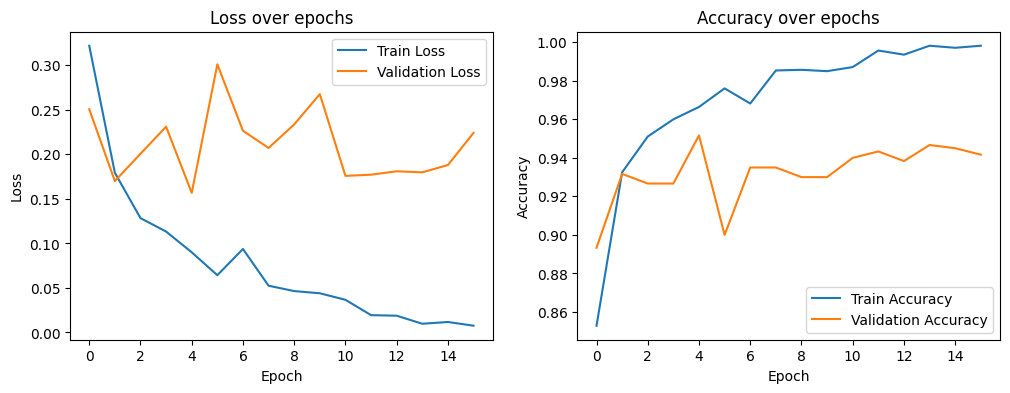

In [53]:
plot(train_losses_resnet, train_accuracies_resnet, val_losses_resnet, val_accuracies_resnet)

The plot of ResNet18 are as follows:

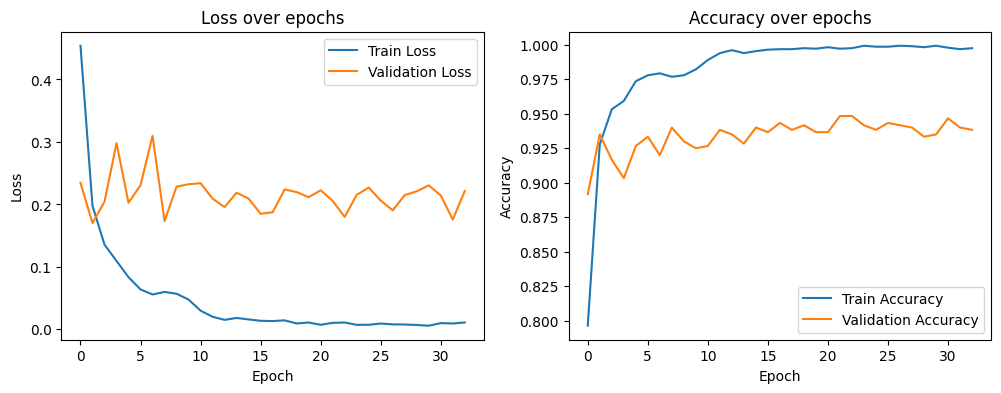

In [54]:
plot(train_losses_resnet18, train_accuracies_resnet18, val_losses_resnet18, val_accuracies_resnet18)

The plot of CNN are as follows:

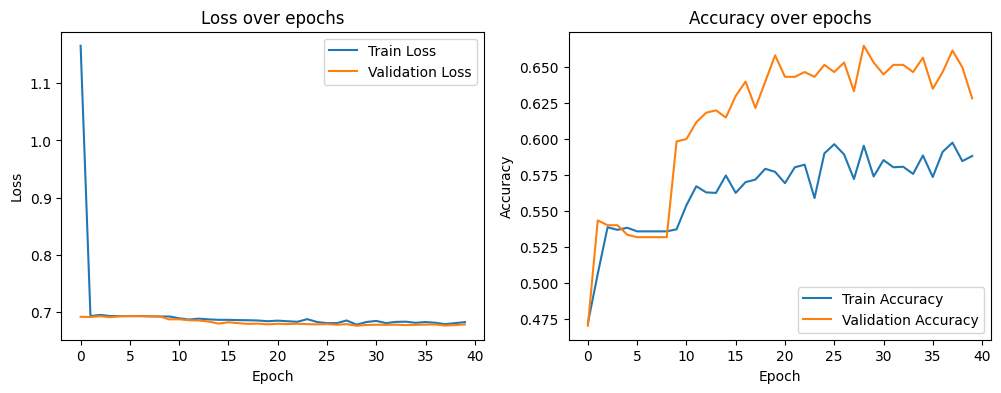

In [55]:
plot(train_loss_cnn, train_acc_cnn, val_loss_cnn, val_acc_cnn)

The plots of CNN are invalid, indicating several reasons:
1. Different hyperparemeters should be set, such as batch_size, learning rate and so on.

2. Simple networks may be hard to deal with such a question.

The plots of SVM are as follows:

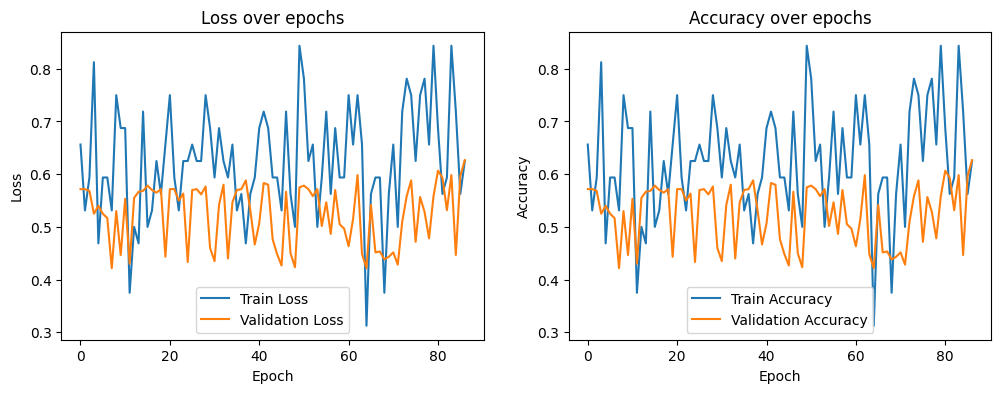

In [56]:
plot(train_loss, train_acc, test_loss, batch_acc)

To be mentioned:

We treat the training of SVM which uses Mini-batch as an *epoch-like process*, where each mini-batch is an epoch4

train_loss and train_accuracy are based on each batch considering the memory limitation while validation_loss and validation_accuracy are based on the entire validation dataset.

The implementation of detection graph plot is as follows:

In [57]:
def plot_detection(train_losses, val_losses): 
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

The plot of ResNet50 are as follows:

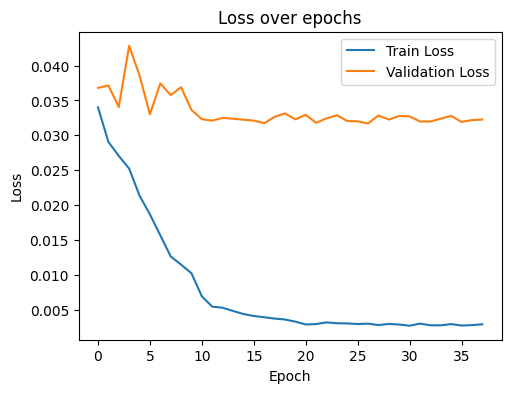

In [58]:
plot_detection(train_mse_losses_resnet, val_mse_losses_resnet)

The plot of ResNet18 are as follows:

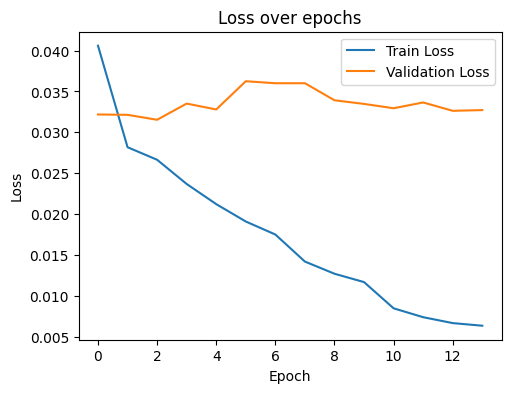

In [59]:
plot_detection(train_mse_losses_resnet18, val_mse_losses_resnet18)

The plot of CNN is as follows:

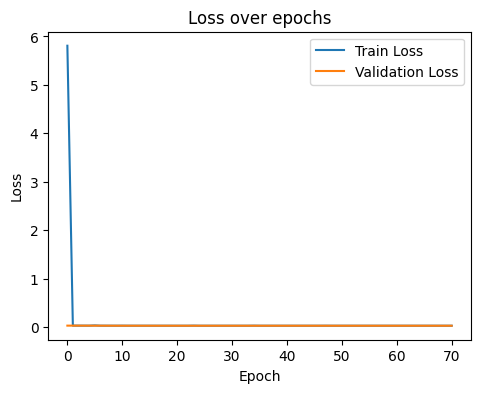

In [60]:
plot_detection(train_mse_cnn, val_mse_cnn)

# 9 Conclusions

- **Contributions:**

  1. **Model Evaluation:** Conducted 'Whether-Smile' classification and 'Head-Pos' detection using various models, including SVM, CNN, and ResNet.
  2. **Data Augmentation:** Enhanced data robustness through methods such as rotation, flipping, and dropping random pixels.
  3. **Architecture Comparison:** Analyzed the performance differences between various model architectures.

  **Conclusions:**

  1. **High-Quality Dataset Impact:** Training or fine-tuning on the high-quality 'geni4k' dataset significantly enhances model capabilities. For example, ResNet18 achieved an accuracy of 94%.
  2. **Advantage of Pretrained Models:** Fine-tuning a pre-trained model, as opposed to training from scratch, notably improves performance. ResNet50 and ResNet18 outperformed a basic CNN, with accuracies of 93% and 94% compared to 65%, respectively.
  3. **Model Depth and Performance:** Increasing model depth substantially improves performance. Transitioning from a 4-layer CNN to ResNet18 (18-layer CNN with residual connections) saw accuracy jump from 65% to 94%. However, the performance of ResNet18 and ResNet50 was similar, suggesting that for simpler tasks like classification, depth alone might not suffice, and additional alignment methods might be needed.
  4. **Machine Learning Model Variability:** Models like SVM showed inconsistent performance across different batches due to their less flexible nature when processing the entire dataset.

  **Proposed Improvements:**

  1. Utilize the ResNet model primarily for smile and pose detection tasks.
  2. Perform a thorough evaluation of various models' effectiveness in smile and pose detection, including both machine learning algorithms and deep neural networks.

  **Future Work:**

  1. Explore the use of visual Large Language Models (LLMs) for smile detection, considering their rising prevalence.
  2. Leverage Multi-modal LLMs, such as BLIP or CLIP, for annotating the limited dataset of 4000 images.
  3. For more nuanced results, consider implementing finer-grained labels that include human pose and facial position. This approach may involve aligning images to focus on humans, thereby reducing noise, before feeding them into the prediction model.